# _Unsupervised Learning:   Hierarchical Clustering and K-Means_


## Agglomerative Hierarchical Clustering

Useful readings can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) and [here](https://en.wikipedia.org/wiki/Hierarchical_clustering).


### Short Demo

In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Values extracted from the official scikit-learn documentation (check the first link).
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

In [3]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

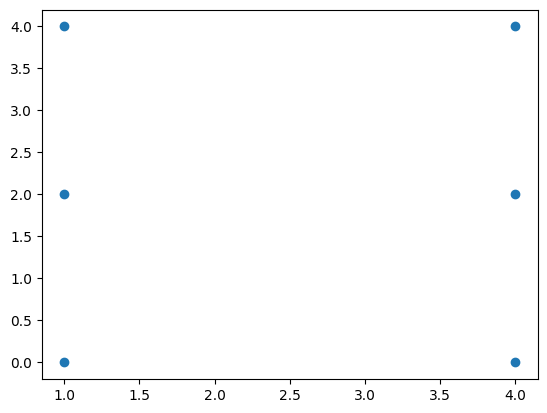

In [4]:
# Visualise data
plt.scatter(X[:,0], X[:,1])

In [5]:
# Agglomerative Hierarchical Clustering model with no parameters
aggl_model_demo = AgglomerativeClustering().fit(X)

In [6]:
aggl_model_demo

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [7]:
# Cluster labels for each point
aggl_model_demo.labels_

array([1, 1, 1, 0, 0, 0])

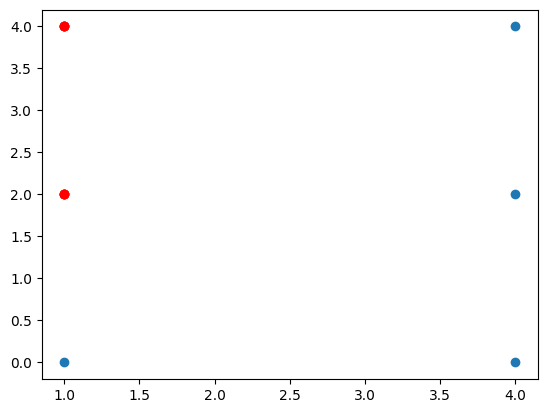

In [8]:
# Visualise data

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[aggl_model_demo.labels_,0], X[aggl_model_demo.labels_,1], c='r')

### Task 0

Play around with `data.txt` and:
* Plot data before applying the _Agglomerative Hierarchical Clustering_ algorithm (**TO DO1**);
* **TO DO2**:
    - Define a new variable _X_ to store `data_txt`,
    - Apply the _Agglomerative Hierarchical Clustering_ algorithm and modify its parameters for 15 clusters;
    - Write down your observations for different values of `affinity` (_"euclidean"_ or _"manhattan"_) and `linkage` (_"ward"_ or _"complete"_);
* Visualise the obtained clusters.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

In [9]:
# Load data for this exercise
data_txt = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

In [10]:
data_txt

array([[665845., 557965.],
       [597173., 575538.],
       [618600., 551446.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]])

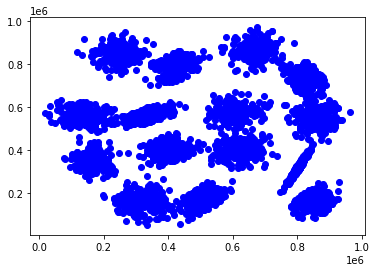

In [15]:
# TO DO1

In [ ]:
# TO DO2
X 

# Define model

# Use the fit_predict() function
y_predict

# Get the labels and use them in your plot
labels

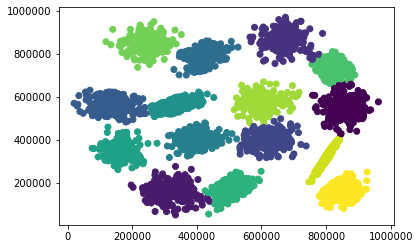

In [ ]:
# Expected plot for TO DO2

**TO DO3**: Use the _Nearest Centroid_ [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html) to compute the centroids of each cluster.

In [ ]:
# TO DO3
# Expected Output:
print('Centroids:')
print(centroids)

Centroids:
[[858523.47107438 549109.0137741 ]
 [321607.60349854 161194.23323615]
 [672400.67597765 861555.2849162 ]
 [619663.6884273  398658.75074184]
 [140019.83526012 558305.60115607]
 [417799.69426752 787001.99363057]
 [399223.625      404923.23579545]
 [337858.94189602 562276.80428135]
 [167727.3880597  348147.6       ]
 [508441.62931034 176054.77873563]
 [823717.6744186  733102.37209302]
 [244654.8856305  847642.04105572]
 [606060.5959596  574146.15824916]
 [802138.44551282 319314.90384615]
 [852675.82769231 157386.94461538]]


**TO DO4:** Iterate through the obtained labels and visualise each cluster with its corresponding centroid.

In [ ]:
unique_labels = np.unique(labels)

# TO DO4

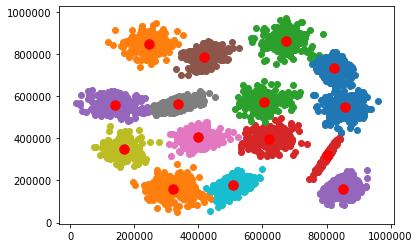

In [ ]:
# Expected Output:

## K-Means

Please refer to this [document](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for more information.

### Task 1

Play around with `data.txt` and:
* **TO DO1**: Apply the _K-Means Clustering_ algorithm and generate 15 clusters;
* **TO DO2**: Write down your observations for the `algorithm` parameter (_"lloyd"_ or _"elkan"_);
* **TO DO3**: Compute the centroids for each cluster;
* **TO DO4**: Visualise the obtained clusters with their corresponding centroids.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

In [ ]:
# TO DO1

In [ ]:
# TO DO2

In [ ]:
# TO DO3

In [ ]:
# Expected Output:
centroids

array([[320602.55      , 161521.85      ],
       [858947.97134671, 546259.65902579],
       [337264.76291793, 562123.37993921],
       [417799.69426752, 787001.99363057],
       [852058.45259939, 157685.52293578],
       [507818.31339031, 175610.41595441],
       [606380.41554054, 574534.59121622],
       [139395.22898551, 558143.94202899],
       [670929.06818182, 862765.73295454],
       [244654.8856305 , 847642.04105572],
       [801616.78164557, 321123.34177215],
       [617926.67761194, 399415.94925373],
       [398870.04843305, 404924.06552707],
       [823421.2507837 , 731145.27272727],
       [167856.14071856, 347812.71556886]])

In [ ]:
unique_labels = np.unique(labels)

# TO DO4

### Task 2

Try to modify the number of clusters for `data2.txt` and write down your observations for the _Agglomerative Hierarchical Clustering_ model.